In [1]:
from __future__ import unicode_literals, print_function, division

# System imports
import os
import sys
import argparse

# Numerics
import numpy as np
from numpy import ma
from scipy.interpolate import InterpolatedUnivariateSpline
from math import floor

# Plotting
import matplotlib.pyplot as plt
from matplotlib import scale as mscale
from matplotlib.transforms import Transform
from matplotlib.ticker import FixedLocator

# CLASS

from classy import Class

In [2]:
# Creates an instance of CLASS
cosmo = Class()
CLASS_INPUT={}
raw_cl={}

In [3]:
cosmo.struct_cleanup()
cosmo.set_default()
cosmo.compute()
raw_cl['default']=cosmo.raw_cl()
cosmo.struct_cleanup()

In [9]:
data_sets_non_def=('extra_nur','dsg_basic','dsg_nap','dsg_vis')


CLASS_INPUT['extra_nur']={"N_ur":3.351,'output':'tCl'}
CLASS_INPUT['dsg_basic']={'output':'tCl',
                        'dsg_log10a_vals': '-15.,-14.673,-14.347,-14.02,-13.694,-13.367,-13.041,-12.714,-12.388,-12.061,-11.735,-11.408,-11.082,-10.755,-10.429,-10.102,-9.7755,-9.449,-9.1224,-8.7959,-8.4694,-8.1429,-7.8163,-7.4898,-7.1633,-6.8367,-6.5102,-6.1837,-5.8571,-5.5306,-5.2041,-4.8776,-4.551,-4.2245,-3.898,-3.5714,-3.2449,-2.9184,-2.5918,-2.2653,-1.9388,-1.6122,-1.2857,-0.95918,-0.63265,-0.30612,0.020408,0.34694,0.67347,1.',
                        'dsg_w_vals':  '0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333',
                        'dsg_alpha' : 0.00001200901405
                       }
CLASS_INPUT['dsg_nap']={'output':'tCl',
                        'nap' : 'y',
                        'dsg_c_eff2':0.3333333333,
                        'dsg_log10a_vals': '-15.,-14.673,-14.347,-14.02,-13.694,-13.367,-13.041,-12.714,-12.388,-12.061,-11.735,-11.408,-11.082,-10.755,-10.429,-10.102,-9.7755,-9.449,-9.1224,-8.7959,-8.4694,-8.1429,-7.8163,-7.4898,-7.1633,-6.8367,-6.5102,-6.1837,-5.8571,-5.5306,-5.2041,-4.8776,-4.551,-4.2245,-3.898,-3.5714,-3.2449,-2.9184,-2.5918,-2.2653,-1.9388,-1.6122,-1.2857,-0.95918,-0.63265,-0.30612,0.020408,0.34694,0.67347,1.',
                        'dsg_w_vals':  '0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333',
                        'dsg_alpha' : 0.00001200901405
                       }
CLASS_INPUT['dsg_vis']={'output':'tCl',
                        'dsg_c_vis2':0.3333333333,
                        'nap' : 'y',
                        'dsg_c_eff2':0.3333333333,
                        'dsg_log10a_vals': '-15.,-14.673,-14.347,-14.02,-13.694,-13.367,-13.041,-12.714,-12.388,-12.061,-11.735,-11.408,-11.082,-10.755,-10.429,-10.102,-9.7755,-9.449,-9.1224,-8.7959,-8.4694,-8.1429,-7.8163,-7.4898,-7.1633,-6.8367,-6.5102,-6.1837,-5.8571,-5.5306,-5.2041,-4.8776,-4.551,-4.2245,-3.898,-3.5714,-3.2449,-2.9184,-2.5918,-2.2653,-1.9388,-1.6122,-1.2857,-0.95918,-0.63265,-0.30612,0.020408,0.34694,0.67347,1.',
                        'dsg_w_vals':  '0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333',
                        'dsg_alpha' : 0.00001200901405
                       }


In [10]:
for data_set in data_sets_non_def:
    cosmo.struct_cleanup()
    cosmo.empty()
    cosmo.set(CLASS_INPUT[data_set])
    cosmo._fillparfile()
    cosmo.compute()
    raw_cl[data_set]=cosmo.raw_cl()

cosmo.struct_cleanup()
cosmo.empty()

In [19]:
k_vals=raw_cl['default']['ell'][2:]
cl={}
cl['default']=raw_cl['default']['tt'][2:]
for name in data_sets_non_def:
    cl[name]=raw_cl[name]['tt'][2:]

In [21]:
cl_ratio={}
for name in data_sets_non_def:
    cl_ratio[name]=cl[name]/cl['default']-1

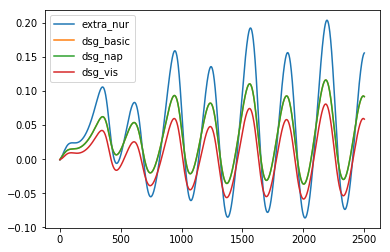

In [32]:
plt.figure(1)
for name in data_sets_non_def:
    plt.plot(k_vals,cl_ratio[name])

plt.legend(data_sets_non_def)

In [34]:
data_PATH="/home/mmeiers/Projects/class_public/output/"
output_PATH="/home/mmeiers/Projects/class_public/MyWorkspace/Plots";

datafile_def_PATH=data_PATH+"dsg_test_def00_cl.dat"

In [35]:
datafile_def_PATH=data_PATH+"dsg_test_def00_cl.dat"
datafile_nur_PATH=data_PATH+"dsg_test_N_ur00_cl.dat"
datafile_basic_PATH=data_PATH+"dsg_test_basic00_cl.dat"
datafile_nap_PATH=data_PATH+"dsg_test_nap00_cl.dat"
datafile_vis_PATH=data_PATH+"dsg_test_vis00_cl.dat"
datafile_defclass_PATH=data_PATH+"dsg_test_def01_cl.dat"
datafiles=[datafile_def_PATH,datafile_nur_PATH,datafile_basic_PATH,datafile_nap_PATH,datafile_vis_PATH,datafile_defclass_PATH]

In [36]:
data = []
for data_file in datafiles:
    data.append(np.loadtxt(data_file))

In [37]:
k_vals=data[0][:,0]
cl0_vals=data[0][:,1]
cl_nur=data[1][:,1]
cl_basic=data[2][:,1]
cl_nap=data[3][:,1]
cl_vis=data[4][:,1]
cl0class_vals=data[5][:,1]

In [38]:
cl_ratio_nur=cl_nur/cl0_vals-1
cl_ratio_basic=cl_basic/cl0_vals-1
cl_ratio_nap=cl_nap/cl0_vals-1
cl_ratio_vis=cl_vis/cl0_vals-1
cl_ratio_class=cl0class_vals/cl0_vals-1

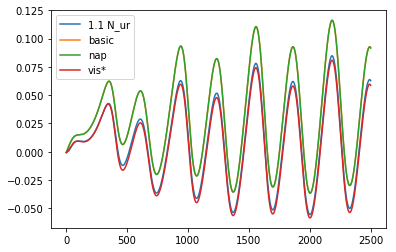

In [39]:
plt.figure(2)
plt.plot(k_vals,cl_ratio_nur,k_vals,cl_ratio_basic,k_vals,cl_ratio_nap,k_vals,cl_ratio_vis)
plt.legend(("1.1 N_ur","basic","nap","vis*"))

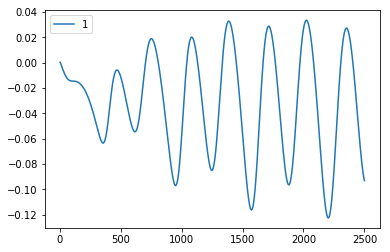

In [40]:
plt.figure(2)
plt.plot(k_vals,cl_ratio_nur-cl_ratio['extra_nur'])
plt.legend(("1.1 N_ur"))